Community 1 = 44
Community 2 = 18


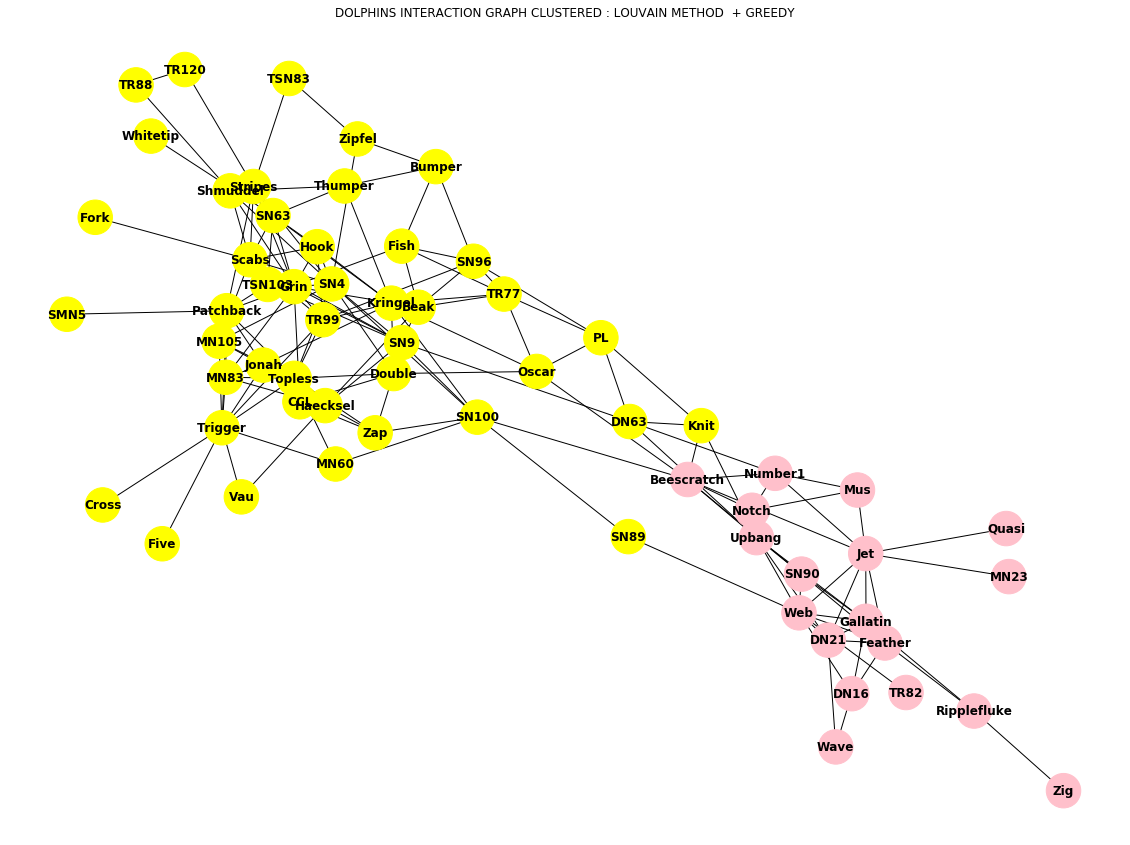

In [3]:
import community
import copy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


data = nx.read_gml("./data/dolphins.gml")
#preserving labels for future use
labels = {}
labels_list = list(data.nodes())
for i in range(len(list(data.nodes()))):
    labels[i] = labels_list[i]
dolphin_matrix_1 = nx.to_numpy_matrix(data)
g1 = nx.from_numpy_matrix(dolphin_matrix_1)



def list_to_dict(l):
    p = {}
    for i in range(len(l)):
        for j in range(len(l[i])):
            p[l[i][j][0]]=l[i][j][1]
    return p

def louvain_inbuilt():
    G = data
    cluster = community.best_partition(G,random_state=2)
    n_cluster = max(cluster.values()) + 1
       
    communities = []
    for i in range(n_cluster):
            communities_temp = [list(item) for item in cluster.items() if item[1] == i]
            communities.append(communities_temp)
    return communities,cluster,n_cluster

#------------------------------------------------------------------------------------
# (Taking two biggest clusters output of Louvain and appending all possible 
# modularities+corresponding partition in list 'global_modularity')
#------------------------------------------------------------------------------------

def greedy_modularity(a,b,l,cm1,cm2,G):
    k=0
    while(k<len(l)):
        
        for i in range(k,len(l)):
            for j in range(len(l[i])):
                    l[i][j][1]=a
        for i in range(k):
            for j in range(len(l[i])):
                    l[i][j][1]=b
        if cm1 not in l:
            l.append(cm1)
        if cm2 not in l:
            l.append(cm2)
        p = list_to_dict(l)
        global_modularity.append([community.modularity(p,G),p])
        
        k=k+1
            
def greedy_driver(communities,flag):
    size_of_clusters = [len(i) for i in communities]
    
    cluster_max_1_index = size_of_clusters.index(max(size_of_clusters))
    size_of_clusters[cluster_max_1_index] = -1
    cluster_max_1 = communities[cluster_max_1_index]
    cluster_max_2_index = size_of_clusters.index(max(size_of_clusters))
    cluster_max_2 = communities[cluster_max_2_index]
    communities.remove(cluster_max_1)
    communities.remove(cluster_max_2)
    if flag==1:
        greedy_modularity(cluster_max_1[0][1],cluster_max_2[0][1],communities,cluster_max_1,cluster_max_2,data)
    else:
        greedy_modularity(cluster_max_2[0][1],cluster_max_1[0][1],communities,cluster_max_2,cluster_max_1,data)    

#-------------------Function calls---------------------------
global_modularity = []
communities,louvain_partition,n_cluster = louvain_inbuilt()
temp = copy.deepcopy(communities)
test = copy.deepcopy(communities)
greedy_driver(communities,1)
greedy_driver(temp,2)
mod_list=[]
for i in range(len(global_modularity)):
    mod_list.append(global_modularity[i][0])
max_modularity_cluster_index = mod_list.index(max(mod_list))


#---------------Picking partition with maximum modularity-------
partition = global_modularity[max_modularity_cluster_index][1]


#-----------Plotting----------------------------------------------

colors=[]
c1 = partition['Beak']
G=data
for i in G.nodes():

    if partition[i]==c1:
        colors.append('yellow')
    else:
        colors.append('pink')
count = [1 if i =='yellow' else 0 for i in colors]
print("Community 1 = "+str(sum(count))+"\nCommunity 2 = "+ str(62-sum(count)))



plt.figure(1,figsize=(20,15))
plt.title("DOLPHINS INTERACTION GRAPH CLUSTERED : LOUVAIN METHOD  + GREEDY")
dolphin_graph_r = nx.Graph()
nx.draw(g1,with_labels=True,font_weight='bold',font_color='black',node_color=colors,labels=labels,node_size=1190)


